In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir('C:\Users\izana\Downloads')

In [3]:
df=pd.read_excel('Assignment.xlsx',sheet_name='Sales',parse_dates=True,index_col='Date')

In [4]:
df.head()

,State Id,Region,Type,Sales,Queue
Date,,,,,
2019-01-01,1,Central,Residential,20.0,Store
2019-01-02,1,Central,Residential,342.0,Store
2019-01-03,1,Central,Residential,187.0,Store
2019-01-04,1,Central,Residential,215.0,Store
2019-01-05,1,Central,Residential,46.0,Store


In [5]:
df1=pd.read_excel('Assignment.xlsx',sheet_name='Revenue',parse_dates=True,index_col='Date')

In [6]:
df1.shape

(30384, 5)

In [7]:
df1.head()

,State Id,Region,Type,Revenue,Queue
Date,,,,,
2019-01-01,1,Central,Residential,10056.3200,Store
2019-01-02,1,Central,Residential,5263.0184,Store
2019-01-03,1,Central,Residential,216.0170,Store
2019-01-04,1,Central,Residential,0.0000,Store
2019-01-05,1,Central,Residential,23037.1120,Store


In [8]:
df.head()

,State Id,Region,Type,Sales,Queue
Date,,,,,
2019-01-01,1,Central,Residential,20.0,Store
2019-01-02,1,Central,Residential,342.0,Store
2019-01-03,1,Central,Residential,187.0,Store
2019-01-04,1,Central,Residential,215.0,Store
2019-01-05,1,Central,Residential,46.0,Store


In [10]:
df2=pd.read_excel('Assignment.xlsx',sheet_name='State_Region Mapping')

In [11]:
df2.tail()

,Region,State,State Id
7,North,Haryana,8
8,North,Himachal Pradesh,9
9,South,AndhraPradesh,10
10,South,Karnataka,11
11,South,TamilNadu,12


In [12]:
d={1:'Jharkhand',2:'Odisha',3:'Uttar Pardesh',4:'Goa',5:'Gujrat',6:'Maharashtra',7:'Delhi',8:'Haryana',9:'Himachal Pardesh'
  ,10:'AndhraPardesh',11:'Karnataka',12:'TamilNadu'}

In [13]:
df['State']=df['State Id'].map(d)

In [14]:
df.head()

,State Id,Region,Type,Sales,Queue,State
Date,,,,,,
2019-01-01,1,Central,Residential,20.0,Store,Jharkhand
2019-01-02,1,Central,Residential,342.0,Store,Jharkhand
2019-01-03,1,Central,Residential,187.0,Store,Jharkhand
2019-01-04,1,Central,Residential,215.0,Store,Jharkhand
2019-01-05,1,Central,Residential,46.0,Store,Jharkhand


In [15]:
df['State Id'].isnull().sum()

0

In [17]:
df['Revenue']=df1['Revenue']

In [18]:
df.head()

,State Id,Region,Type,Sales,Queue,State,Revenue
Date,,,,,,,
2019-01-01,1,Central,Residential,20.0,Store,Jharkhand,10056.3200
2019-01-02,1,Central,Residential,342.0,Store,Jharkhand,5263.0184
2019-01-03,1,Central,Residential,187.0,Store,Jharkhand,216.0170
2019-01-04,1,Central,Residential,215.0,Store,Jharkhand,0.0000
2019-01-05,1,Central,Residential,46.0,Store,Jharkhand,23037.1120


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30384 entries, 2019-01-01 to 2021-06-18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State Id  30384 non-null  int64  
 1   Region    30384 non-null  object 
 2   Type      30384 non-null  object 
 3   Sales     30054 non-null  float64
 4   Queue     30384 non-null  object 
 5   State     30384 non-null  object 
 6   Revenue   30384 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.9+ MB


In [18]:
df.isnull().sum()

Date          0
State Id      0
Region        0
Type          0
Sales       330
Queue         0
State         0
Revenue       0
dtype: int64

In [20]:
import seaborn as sns


<AxesSubplot:xlabel='Sales'>

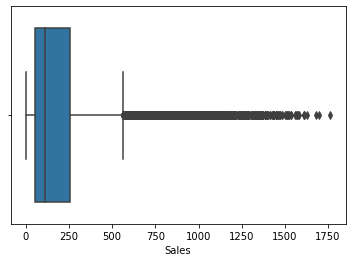

In [21]:
sns.boxplot(x='Sales',data=df)

In [97]:
#Q1
## Sales column has outliers hence median will be the better approach to fill missing values.
df['Sales']=df['Sales'].fillna(df['Sales'].median())

In [23]:
df.isnull().sum()

State Id    0
Region      0
Type        0
Sales       0
Queue       0
State       0
Revenue     0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30384 entries, 2019-01-01 to 2021-06-18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State Id  30384 non-null  int64  
 1   Region    30384 non-null  object 
 2   Type      30384 non-null  object 
 3   Sales     30384 non-null  float64
 4   Queue     30384 non-null  object 
 5   State     30384 non-null  object 
 6   Revenue   30384 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.9+ MB


In [25]:
df.drop('State Id',axis=1,inplace=True)

In [25]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
df.head()

,Region,Type,Sales,Queue,State,Revenue
Date,,,,,,
2019-01-01,Central,Residential,20.0,Store,Jharkhand,10056.3200
2019-01-02,Central,Residential,342.0,Store,Jharkhand,5263.0184
2019-01-03,Central,Residential,187.0,Store,Jharkhand,216.0170
2019-01-04,Central,Residential,215.0,Store,Jharkhand,0.0000
2019-01-05,Central,Residential,46.0,Store,Jharkhand,23037.1120


In [27]:
df.groupby('Region').sum()

,Sales,Revenue
Region,,
Central,2671032.0,3.708864e+08
North,1003984.0,1.210946e+08
South,839983.0,7.925154e+07
West,1489450.0,1.812168e+08


In [32]:
df_fin=df.resample('BM').sum()

In [33]:
df_fin

,Sales,Revenue
Date,,
2019-01-31,273033.0,2.923274e+07
2019-02-28,221206.0,2.995756e+07
2019-03-29,231224.0,2.618228e+07
2019-04-30,246817.0,2.833742e+07
2019-05-31,261696.0,2.753284e+07
2019-06-28,235445.0,2.531707e+07
2019-07-31,271201.0,2.878739e+07
2019-08-30,262707.0,2.669668e+07
2019-09-30,237824.0,2.744893e+07


In [36]:
##Percentage chage in sales on monthly basis is shown below
df_fin['Sales_per_change']=df_fin['Sales'].pct_change().round(2)

In [37]:
df_fin

,Sales,Revenue,Sales_per_change
Date,,,
2019-01-31,273033.0,2.923274e+07,NaN
2019-02-28,221206.0,2.995756e+07,-0.19
2019-03-29,231224.0,2.618228e+07,0.05
2019-04-30,246817.0,2.833742e+07,0.07
2019-05-31,261696.0,2.753284e+07,0.06
2019-06-28,235445.0,2.531707e+07,-0.10
2019-07-31,271201.0,2.878739e+07,0.15
2019-08-30,262707.0,2.669668e+07,-0.03
2019-09-30,237824.0,2.744893e+07,-0.09


In [38]:
import datetime

In [44]:
df_fin.reset_index().head()

,Date,Sales,Revenue,Sales_per_change
0,2019-01-31,273033.0,2.923274e+07,NaN
1,2019-02-28,221206.0,2.995756e+07,-0.19
2,2019-03-29,231224.0,2.618228e+07,0.05
3,2019-04-30,246817.0,2.833742e+07,0.07
4,2019-05-31,261696.0,2.753284e+07,0.06


In [49]:
df_fin=df_fin.reset_index()

In [51]:
df_fin.head()

,Date,Sales,Revenue,Sales_per_change
0,2019-01-31,273033.0,2.923274e+07,NaN
1,2019-02-28,221206.0,2.995756e+07,-0.19
2,2019-03-29,231224.0,2.618228e+07,0.05
3,2019-04-30,246817.0,2.833742e+07,0.07
4,2019-05-31,261696.0,2.753284e+07,0.06


In [57]:
##Q3
##Change in revenue of current month's revenue wrt to last month's revenue
df_fin['Change_in_Revenue']=df_fin['Revenue'].diff()

In [58]:
df_fin.head()

,Date,Sales,Revenue,Sales_per_change,Change_in_Revenue
0,2019-01-31,273033.0,2.923274e+07,NaN,NaN
1,2019-02-28,221206.0,2.995756e+07,-0.19,7.248192e+05
2,2019-03-29,231224.0,2.618228e+07,0.05,-3.775275e+06
3,2019-04-30,246817.0,2.833742e+07,0.07,2.155141e+06
4,2019-05-31,261696.0,2.753284e+07,0.06,-8.045872e+05


In [64]:
result=df_fin.sort_values(by='Revenue',ascending=False)
result.head()

,Date,Sales,Revenue,Sales_per_change,Change_in_Revenue
1,2019-02-28,221206.0,2.995756e+07,-0.19,7.248192e+05
9,2019-10-31,259632.0,2.961988e+07,0.09,2.170951e+06
0,2019-01-31,273033.0,2.923274e+07,NaN,NaN
6,2019-07-31,271201.0,2.878739e+07,0.15,3.470320e+06
3,2019-04-30,246817.0,2.833742e+07,0.07,2.155141e+06


In [59]:
a=(df_fin['Date'].dt.month==5)&(df_fin['Date'].dt.year==2021)

In [60]:
df_fin[a]

,Date,Sales,Revenue,Sales_per_change,Change_in_Revenue
28,2021-05-31,159641.0,2.392590e+07,-0.09,-1.684673e+06


In [65]:
df.head()

,Region,Type,Sales,Queue,State,Revenue
Date,,,,,,
2019-01-01,Central,Residential,20.0,Store,Jharkhand,10056.3200
2019-01-02,Central,Residential,342.0,Store,Jharkhand,5263.0184
2019-01-03,Central,Residential,187.0,Store,Jharkhand,216.0170
2019-01-04,Central,Residential,215.0,Store,Jharkhand,0.0000
2019-01-05,Central,Residential,46.0,Store,Jharkhand,23037.1120


In [82]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Queue'>

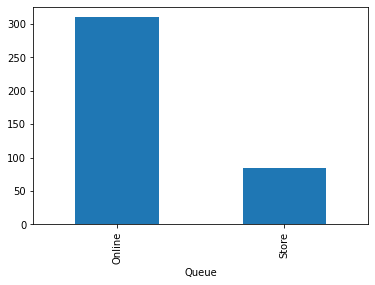

In [83]:
#It is quite evident from the bar graph below that we have more online sales.
df.groupby('Queue')['Sales'].mean().plot(kind='bar')

In [70]:
df['Queue'].value_counts()

Online    15192
Store     15192
Name: Queue, dtype: int64

In [71]:
##Sales and Revenue are correlated
df.corr()

,Sales,Revenue
Sales,1.000000,0.714625
Revenue,0.714625,1.000000


<AxesSubplot:xlabel='Sales', ylabel='Revenue'>

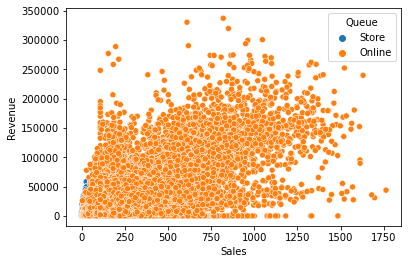

In [68]:
sns.scatterplot(x='Sales',y='Revenue',data=df,hue='Queue')

In [74]:
##Central Region is performing better among all these regions.
df.groupby(['Region','Queue']).mean()

Sales       Revenue
Region  Queue                           
Central Online  565.320695  85430.157222
        Store   137.952607  12222.916302
North   Online  202.557135  27895.083211
        Store    61.788310   3988.684901
South   Online  166.046603  18264.664167
        Store    55.117957   2601.987914
West    Online  306.484729  41686.354902
        Store    85.682201   6027.390907

<AxesSubplot:xlabel='Region'>

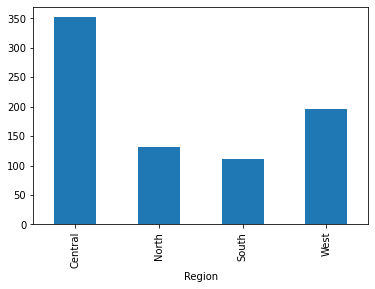

In [86]:
df.groupby('Region')['Sales'].mean().plot(kind='bar')

In [80]:
df.groupby(['State','Queue']).mean()

Sales        Revenue
State            Queue                            
AndhraPardesh    Online  128.755924   16196.695527
                 Store    48.583728    2317.965770
Delhi            Online  119.458136   30695.866958
                 Store    46.505529    4452.269877
Goa              Online  226.116904   29573.247781
                 Store    68.278041    4293.651258
Gujrat           Online  400.575829   60074.443435
                 Store   105.048973    8651.465160
Haryana          Online  231.581359   30799.521892
                 Store    66.132701    4356.062060
Himachal Pardesh Online  256.631912   22189.860782
                 Store    72.726698    3157.722766
Jharkhand        Online  531.172196   73132.167731
                 Store   128.360190   10401.405698
Karnataka        Online  204.127962   22793.019234
                 Store    61.948657    3226.324731
Maharashtra      Online  292.761453   35411.373489
                 Store    83.719589    5137.056303
Odisha           Online  691.251185  117414.737242
                 Store   168.236967   16674.516950
TamilNadu        Online  165.255924   15804.277740
                 Store    54.821485    2261.673241
Uttar Pardesh    Online  473.538705   65743.566694
                 Store   117.260664    9592.826256

In [81]:
#Orissa's performance is best in both online as well as in store sales.
df.groupby(['State','Queue']).mean().idxmax()

Sales      (Odisha, Online)
Revenue    (Odisha, Online)
dtype: object

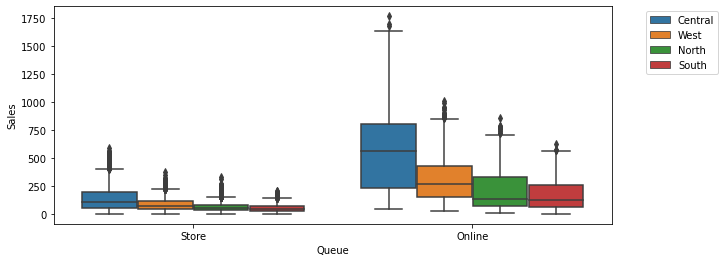

In [96]:
#It is also clear from box plot below that Central region is performing better both in store and online.
plt.figure(figsize=(10,4))
sns.boxplot(data=df,y='Sales',x='Queue',hue='Region')
plt.legend(bbox_to_anchor=(1.2,1))